# MI-SPI - Domácí úkol 1.
---
#### Skupina: 
    - Anna Moudrá (moudrann, paralelka 102) - reprezentant
    - Vojtěch Polcar (polcavoj, paralelka 108)

Nejprve určíme parametry pro výpočet hodnot, které určí soubory pro vypracování úkolů.

In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
k = 16
l = 6
x = ((k*l*23) % 20 ) +1
y = ((x + ((k*5 + l*7) % 19) ) % 20 ) + 1

In [3]:
str_X = (3 - len(str(x)))*'0'+ str(x) + '.txt'
str_Y = (3 - len(str(y)))*'0'+ str(y) + '.txt'

print("Text X:",str_X)
print("Text Y:",str_Y)

Text X: 009.txt
Text Y: 018.txt


---
### 1. Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.

Oba texty nejrpve načteme a poté rozdělíme na jednotlivá slova. 
Z délek těchto slov následně vypočítáme odhad střední hodnoty délky slova pomocí vzorce: $$\overline{X}=\frac{1}{n}\displaystyle\sum_{i=1}^{n}X_{i}$$
Pro výpočet bodového odhadu rozptylu jednotlivých délek slov použijeme vzorec: $$s^{2}=\frac{1}{n-1}\sum_{i=1}^{n} (X_i - \overline{X})^{2} $$

In [4]:
f = open('./hw1-source/'+str_X, 'r')
X_info = f.readline()
data_X = f.read()
f.close()

f = open('./hw1-source/'+str_Y, 'r')
Y_info = f.readline()
data_Y = f.read()
f.close()

print("Název prvního textu:",X_info)
print("Název druhého textu:",Y_info)

Název prvního textu: The Strange Case Of Dr. Jekyll And Mr. Hyde, by Robert Louis Stevenson

Název druhého textu: Dracula, by Bram Stoker



### Dataset X

In [5]:
words_x = data_X.split(" ") #rozdelime text na slova
lengths_x = [len(x) for x in words_x] #spocteme delky jednotlivych slov

pd_x = pd.DataFrame() #ulozime obe hodnoty do dataframu
pd_x['len'] = lengths_x
pd_x['words'] = words_x

EX = 1/len(words_x)*sum(lengths_x)
print("Odhad střední hodnoty EX:",EX)

varX = (1/(len(words_x) -1))*sum([(x - EX)**2 for x in lengths_x])
print("Bodový odhad rozptylu var(X):",varX)

Odhad střední hodnoty EX: 4.2622641509433965
Bodový odhad rozptylu var(X): 4.99064264970511


### Dataset Y

In [6]:
words_y = data_Y.split(" ")
lengths_y = [len(x) for x in words_y]

pd_y = pd.DataFrame()
pd_y['len'] = lengths_y
pd_y['words'] = words_y

EY = 1/len(words_y)*sum(lengths_y)
print("Odhad střední hodnoty EY:",EY)

varY = (1/(len(words_y) -1))*sum([(x - EY)**2 for x in lengths_y])
print("Bodový odhad rozptylu var(Y):",varY)

Odhad střední hodnoty EY: 4.214814814814815
Bodový odhad rozptylu var(Y): 4.932495795146393


#### Grafické znázornění rozdělení délek slov v datasetech X a Y.

In [7]:
colors = ["#3778bf","#feb308"]

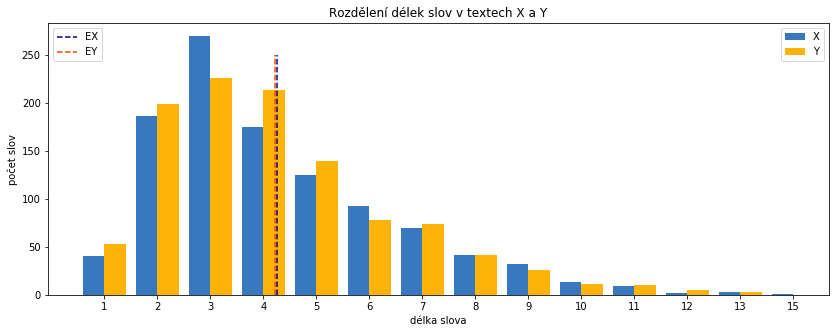

In [8]:
pd_xy = pd.DataFrame(pd_x)
pd_xy['type'] = 'X'
pd_xy = pd_xy.append(pd_y, sort=False)

pd_xy['type'].fillna('Y', inplace=True)

plt.figure(figsize=(14,5))
cnt = sns.countplot(x ='len', hue='type', data=pd_xy, palette=colors, saturation=1)
ey = plt.vlines(x=EY-1, ymin=0, ymax=250, linestyles='dashed', color="orangered")
ex = plt.vlines(x=EX-1, ymin=0, ymax=250, linestyles='dashed', color="darkblue")
plt.title("Rozdělení délek slov v textech X a Y"),plt.xlabel("délka slova"),plt.ylabel("počet slov")
legend1 = plt.legend(loc='upper right')
plt.legend([ex,ey],["EX", "EY"]),plt.gca().add_artist(legend1)
plt.show()

#### Diskuze k výsledku
Texty z obou vybraných knih jsou z konce 19. století od autorů z Britských ostrovů. Můžeme očekávat, že rozdělení slov a jejich použití bude podobné. Tuto skutečnost nám potvrzuje odhad střední hodnoty a rozptylu a následné grafické zobrazení délek slov. V něm vidíme, že jediný větší rozdíl nastává u slov délek 3 a 4.

---
### 2. Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.

Pravděpodobnosti výskytu jednotlivých písmen získáme tak, že nejdříve z textů odstraníme všechny mezery a nasčítáme počet jednotlivých písmen v textech.

In [9]:
x_nospaces = data_X.replace(" ", "")
y_nospaces = data_Y.replace(" ", "")

In [10]:
x_uni = np.array(list(x_nospaces[:]))
x_uni = np.unique(x_uni, return_counts=True)
print(x_uni)

y_uni = np.array(list(y_nospaces[:]))
y_uni = np.unique(y_uni, return_counts=True)
print(y_uni)

(array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'],
      dtype='<U1'), array([366,  65, 105, 205, 561, 102,  87, 276, 279,   7,  37, 194, 109,
       344, 357,  65,   8, 260, 284, 447, 111,  34, 118,   2,  95]))
(array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='<U1'), array([391,  69,  94, 171, 542, 104,  96, 281, 300,   6,  45, 169, 136,
       278, 341,  72,   4, 299, 290, 468, 117,  52, 118,   8,  96,   5]))


Následně výsledné součty (x_uni a y_uni) vydělíme celkovým počtem všech písmen (pro každý text zvlášť).

In [11]:
chars_xy = pd.DataFrame()
chars_xy['char'] = x_uni[0]
chars_xy['count'] = x_uni[1]
chars_xy['prob'] = chars_xy['count']/(np.sum(x_uni[1]))
chars_xy['type'] = 'X'
chars_tmp = pd.DataFrame()
chars_tmp['char'] = y_uni[0]
chars_tmp['count'] = y_uni[1]
chars_tmp['prob'] = chars_tmp['count']/(np.sum(y_uni[1]))
chars_xy = chars_xy.append(chars_tmp, sort=False)
chars_xy['type'].fillna('Y',  inplace=True)

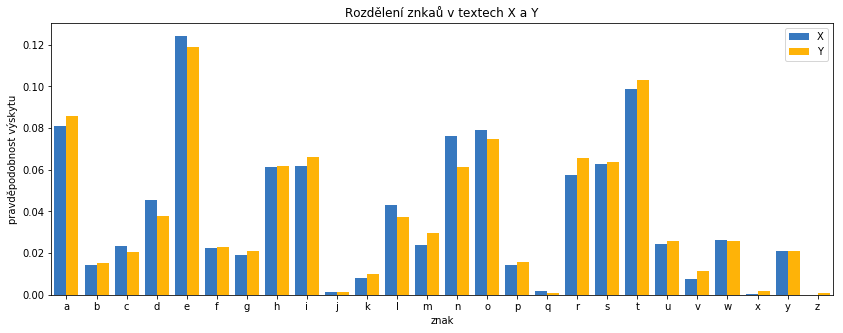

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(x='char', y='prob', hue='type', data=chars_xy, palette=colors, saturation=1)
plt.title("Rozdělení znaků v textech X a Y"),plt.xlabel("znak"),plt.ylabel("pravděpodobnost výskytu")
plt.legend(loc='upper right')
plt.show()

#### Diskuze k výsledku
V grafu můžeme vidět výskyt pravděpodobnost výskytu písmen v jednotlivých textech. Protože se jedná o anglické texty ze stejného období, je i pravděpodobnost výskytu písmen velmi podobná. Nejčastějšími znaky v anglickém jazyce jsou písmena e, t, a - tuto skutečnost graf také potvrzuje.

## Hypotézy


---
### 3. Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
V úloze si nejprve vytvoříme kontingenční tabulku z četností jednotlivých délek slov a poté provedem $\chi^{2}$ nezávislosti. Na hladině významnosti $5\%$ budeme testovat hypotézu:
- Rozdělení se rovnají: $H_0$: $p_{i,j} = p_{i\bullet}p_{\bullet j}$                      
- Rozdělení jsou rozdílná: $H_A$: $p_{i,j} \neq p_{i\bullet}p_{\bullet j}$                      

In [13]:
print("Maximální délka slova v X:", pd_xy[pd_xy.type == "Y"].len.max())
print("Maximální délká slova v Y:", pd_xy[pd_xy.type == "X"].len.max())

delky = range(1, max(pd_xy[pd_xy.type == "Y"].len.max(), pd_xy[pd_xy.type == "X"].len.max())+1)

textX = [pd_xy[(pd_xy.type == "X") & (pd_xy.len == i)].count()[0] for i in delky]
textY = [pd_xy[(pd_xy.type == "Y") & (pd_xy.len == i)].count()[0] for i in delky]

N = np.matrix([textX,textY])
print("Tabulka četností slov různých délek:\n",N)

Maximální délka slova v X: 13
Maximální délká slova v Y: 15
Tabulka četností slov různých délek:
 [[ 40 186 270 175 125  93  70  41  32  13   9   2   3   0   1]
 [ 53 199 226 214 140  78  74  41  26  11  10   5   3   0   0]]


In [14]:
def getNpp(M, n):
    print('Celková suma: n = ',n)
    
    # Odhady marginálních pravděpodobností (parametrů)
    pbj = np.sum(M, axis = 0)/n
    pbi = np.sum(M, axis = 1)/n
    #print('(X a Y) p_ib = ', pbi.reshape((-1,)))
    #print('(cetnosti delek) p_bj = ', pbj)
    
    # Výpočet teoretických četností
    tab_p = pbi@pbj
    npp = tab_p*n
    print('\nTeoretické četnosti n*tab_p:\n', npp)
    return npp
    

In [15]:
s = pd_xy['words'].count()
npp = getNpp(N, s)

Celková suma: n =  2140

Teoretické četnosti n*tab_p:
 [[ 46.06542056 190.70093458 245.68224299 192.68224299 131.26168224
   84.70093458  71.3271028   40.61682243  28.72897196  11.88785047
    9.41121495   3.46728972   2.97196262   0.           0.4953271 ]
 [ 46.93457944 194.29906542 250.31775701 196.31775701 133.73831776
   86.29906542  72.6728972   41.38317757  29.27102804  12.11214953
    9.58878505   3.53271028   3.02803738   0.           0.5046729 ]]


Z tabulky teoretických četností je vidět, že některá pole nesplňují doporučenou podmínku:$$\forall{i,j}: \dfrac{N_i\bullet N_{\bullet j}}{n} \geq 5.$$
Proto jsme se rozhodli zmenšit počet binů $k$, dokud tato podmínka nebude platit. 

In [16]:
def getMergeCols(M):
    columns = set()
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if(M[i, j] < 5.0):
                #print(M[i, j])
                columns.add(j)
    print("Sloupce nesplňující podmínku:",columns)
    return columns
    

def checkMatrixCondition(oldN, oldnpp, n):
    merge_cols = getMergeCols(oldnpp)
    if(len(merge_cols) == 1):
        merge_cols.add(min(merge_cols)-1)
    min_col = min(merge_cols) ## shlukneme sloupce co nesplnuji podminku do jednoho s nejmensim indexem
    merge_cols.remove(min_col)

    for j in range(oldN.shape[1]):
        if(j in merge_cols):
            oldN[:,min_col] += oldN[:, j]
            
    cols = [ x for x in range(0,oldN.shape[1]) if x not in merge_cols]
    newN = oldN[:, cols]
    newnpp = getNpp(newN, n)
    
    merge_cols = getMergeCols(newnpp)
    if(len(merge_cols) > 0):
        newN, newnpp = checkMatrixCondition(newN, newnpp, n)
    return newN, newnpp

In [17]:
oldN = N.copy()
oldnpp = npp.copy()
N, npp = checkMatrixCondition(N,npp, s)

print("\nStará tabulka četností\n",oldN)
print("\nNová tabulka četností\n",N)

Sloupce nesplňující podmínku: {11, 12, 13, 14}
Celková suma: n =  2140

Teoretické četnosti n*tab_p:
 [[ 46.06542056 190.70093458 245.68224299 192.68224299 131.26168224
   84.70093458  71.3271028   40.61682243  28.72897196  11.88785047
    9.41121495   6.93457944]
 [ 46.93457944 194.29906542 250.31775701 196.31775701 133.73831776
   86.29906542  72.6728972   41.38317757  29.27102804  12.11214953
    9.58878505   7.06542056]]
Sloupce nesplňující podmínku: set()

Stará tabulka četností
 [[ 40 186 270 175 125  93  70  41  32  13   9   2   3   0   1]
 [ 53 199 226 214 140  78  74  41  26  11  10   5   3   0   0]]

Nová tabulka četností
 [[ 40 186 270 175 125  93  70  41  32  13   9   6]
 [ 53 199 226 214 140  78  74  41  26  11  10   8]]


#### Testová statistika
Z dat jsme vytvořili novou tabulku četností nad kterou provedeme test nezávislosti dle vzorce: 
$$ \chi^{2}  = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(N_{ij} - \frac{ N_{i\bullet}N_{\bullet j}}{n})}{\frac{ N_{i\bullet}N_{\bullet j}}{n} } $$
Počet stupňů volnosti počítáme jako: $(\#$řádků$ - 1) * (\#$sloupců$ - 1)$.

Výpočet kritické hodnoty: $ \chi_{\alpha,(r-1)(c-1)}^{2}$

Podmínka dle které zamítáme $H_0$ zní: $ \chi^{2} \geq \chi_{\alpha,(r-1)(c-1)}^{2}$

Pomocí statistický funkcí vypočítáme výše zmíněné hodnoty a provedeme test hypotézy.

In [18]:
# Statistika
chi = np.sum(np.square(N - npp)/(npp))
print('\nTestová statistika: Chi^2 = ', chi)

df = ((N.shape[0] - 1 )*(N.shape[1] - 1) )
print("Stupně volnosti:", df)
print('Kritická hodnota:', stats.chi2.isf(0.05, df))


Testová statistika: Chi^2 =  13.285320732012462
Stupně volnosti: 11
Kritická hodnota: 19.67513757268249


In [19]:
# výsledek testu
print("\nVýsledek podmínky zamítnutí:",chi >= stats.chi2.isf(0.05, df))

# Pomocí funkce
s, p, d, e = stats.chi2_contingency(N, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)


Výsledek podmínky zamítnutí: False

Hodnota testové statistiky:  13.285320732012455
p-hodnota: 0.2750867825892949


#### Diskuze k výsledku
Výsledek podmínky zamítnutí je negativní, protože **neplatí** $ \chi^{2} \geq \chi_{0.05,12}^{2} $ a tím pádem jsou délky slov nezávislé na tom, ze kterého textu pochází (nezamítáme $H_0$). Výsledek testu jsme mohli předpokládat kvůli faktu, že jsou oba texty ze stejného období (1886 a 1897).

In [20]:
## vysledky na neupravene matici oldN
# dropneme 14. sloupec s nulama
testN = oldN[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14]]
testnpp = oldnpp[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14]]
print("Neupravená tabulka bez nulových sloupců:",testN)

chi = np.sum(np.square(testN - testnpp)/(testnpp))
print('\nTestová statistika (old): Chi^2 = ', chi)

df = ((testN.shape[0] - 1 )*(testN.shape[1] - 1) )
print("Stupně volnosti:", df)
print('Kritická hodnota:', stats.chi2.isf(0.05, df))
# výsledek testu
print("\nVýsledek podmínky zamítnutí (oldN):",chi >= stats.chi2.isf(0.05, df))

# Pomocí funkce
s, p, d, e = stats.chi2_contingency(testN, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)

Neupravená tabulka bez nulových sloupců: [[ 40 186 270 175 125  93  70  41  32  13   9   2   3   1]
 [ 53 199 226 214 140  78  74  41  26  11  10   5   3   0]]

Testová statistika (old): Chi^2 =  15.285495435017353
Stupně volnosti: 13
Kritická hodnota: 22.362032494826945

Výsledek podmínky zamítnutí (oldN): False

Hodnota testové statistiky:  15.285495435017346
p-hodnota: 0.28987054391678296


Výsledek testu na původních datech dopadl stejně, tedy příliš malé hodnoty některých očekávaných hodnot zde neměly vliv na konečný výsledek testu.

---
### 4. Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.
 
Na hladině významnosti $5\%$ budeme testovat hypotézu $H_0$, že se střední délky slov v obou textech rovnají. Jedná se o dva nezávislé texty (skupiny), takže provedeme dvouvýběrový test.

Nejprve provedeme F-Test na rovnost rozptylů obou textů, podle kterého následně provedeme dvouvýběrový test podle stejných nebo různých rozptylů.

Chceme otestovat hypotézu: $ \sigma_{1}^{2} = \sigma_{2}^{2} $, proti alternativě $ \sigma_{1}^{2} \neq \sigma_{2}^{2} $. K tomu využije testovou statistiku $ T = \frac{s_{X}^2}{s_{Y}^2}$, případně i Bartlettův a Levenův test.

In [21]:
# Test shodnosti rozptylů
n = len(words_x) 
m = len(words_y)

T = varX / varY
print("Testová statistika (F-test):", T)
p_cdf = stats.f.cdf(T, n-1, m-1)
#funkce preziti
p_value = 2*stats.f.sf(T, n-1, m-1)
print("F-test p-hodnota:", p_value)

#pro ne-Normalni rozdeleni X a Y 
import scipy.stats
x_samples = lengths_x[:]
y_samples = lengths_y[:]
B,p = scipy.stats.bartlett(x_samples, y_samples)
print("Bartlett stat:",B, "Bartlett p_val: ",p)
L,p = scipy.stats.levene(x_samples, y_samples)
print("Levene stat:",L, "Levene p_val: ",p)

Testová statistika (F-test): 1.0117885259255435
F-test p-hodnota: 0.8479539146201472
Bartlett stat: 0.03668717501416687 Bartlett p_val:  0.8481033561510454
Levene stat: 0.30298631365647144 Levene p_val:  0.5820738029669725


Rozptyly budeme předpokládat stejné, protože p-hodnota pro zamítnutí je ve všech testech vysoká, tedy $H_0$ nezamítáme. V Levenově testu nám vyšel odhad p hodnoty na 58%, což už se blíží k pravděpodobnosti 50:50, že se rozptyly liší. Proto můžeme čistě pro kontrolu provést i "slabší" test pro různé rozptyly a podívat se, jestli náhodou nevyjde jinak (nevyjde).

In [22]:
# T-test se ruznymi rozptyly
sd = np.sqrt( varX/n + varY/m )
T = ((pd_x['len'].mean() - pd_y['len'].mean())/sd )

print("Hodnota testové statistiky: T = ", T)

nd = sd**4 / ( (1/(n-1))*((varX/n)**2) + (1/(m-1))*((varY/m)**2) )

krit = stats.t.isf(0.05/2, df = nd)
print("Kritická hodnota: t = ", krit)

#Výsledek testu
print('Zamítáme: ', np.abs(T) >= krit)

#P-hodnota
p_value=2*stats.t.sf(np.abs(T), df = nd)
print("p-hodnota: ", p_value)

Hodnota testové statistiky: T =  0.49268194278264094
Kritická hodnota: t =  1.961074847269533
Zamítáme:  False
p-hodnota:  0.6222879604666979


Protože uvažujeme stejnou hodnotu rozptylů, budeme na hladině významnosti $5\%$ testovat hypotézu:
- $H_0$ - $ \mu_{1} = \mu_{2} $, že se střední délky slov v obou textech rovnají, proti alternativě
- $H_A$ - $ \mu_{1} \neq \mu_{2} $, že se střední délky slov v obou textech nerovnají.

Využijeme testovou statistiku T:
$$ T = \frac{\overline{X}_n - \overline{Y}_m}{s_{12}} \sqrt{\frac{nm}{n+m}}$$,
kde $$ s_{12} = \sqrt{\frac{(n-1)s_{X}^2 + (m-1)s_{Y}^2}{n+m-2}} $$
s kritickým oborem $ |T| \geq t_{\alpha/2,n+m-2}$.

In [23]:
# T-test se stejnými rozptyly
s12 = np.sqrt(((n-1)*varX + (m-1)*varY)/(n+m-2))
T = (EX - EY)/s12*np.sqrt(n*m/(n+m))

print("Hodnota testové statistiky: T = ", T)

krit = stats.t.isf(0.05/2, df = n+m-2)
print("Kritická hodnota: t = ", krit)

# výsledek testu
print("Zamítáme: ",np.abs(T) >= krit)

# p-hodnota
p_value = 2*stats.t.sf(np.abs(T), df = n + m -2)
print("p-hodnota:", p_value)

Hodnota testové statistiky: T =  0.492708937267016
Kritická hodnota: t =  1.9610741772191844
Zamítáme:  False
p-hodnota: 0.6222688564504562


#### Diskuze k výsledku
Dle podmínky zamínutí $ |T| \geq t_{0.025,2138} $ je výsledkem nezamítnutí $H_0$, tedy střední délka slov se v obou textech rovná. Toto tvrzení opět potvrzuje velkou podobnost ve vybraných textech, stejně jako v ostatních úlohách.

---
### 5. Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
Stejně jako v úloze 3. si nejprve vytvoříme kontingenční tabulku. Vytvoříme ji z četností jednotlivých písmen a poté provedem $\chi^{2}$ nezávislosti. Na hladině významnosti $5\%$ budeme testovat hypotézy:
- Rozdělení jsou stejná: $H_0$ - $p_{i,j} = p_{i\bullet}p_{\bullet j}$
- Rozdělení se liší: $H_A$ - $p_{i,j} \neq p_{i\bullet}p_{\bullet j}$

In [24]:
abeceda = list(map(chr, range(97, 123)))

textX = [ x_nospaces.count(a) for a in abeceda ]
textY = [ y_nospaces.count(a) for a in abeceda ]

Nchar = np.matrix([textX,textY])
print("Tabulka četností znaků:\n",Nchar)

Tabulka četností znaků:
 [[366  65 105 205 561 102  87 276 279   7  37 194 109 344 357  65   8 260
  284 447 111  34 118   2  95   0]
 [391  69  94 171 542 104  96 281 300   6  45 169 136 278 341  72   4 299
  290 468 117  52 118   8  96   5]]


In [25]:
s = chars_xy['count'].sum()
nppchar = getNpp(Nchar, s)

Celková suma: n =  9070

Teoretické četnosti n*tab_p:
 [[377.08114664  66.74884234  99.12701213 187.2952591  549.43263506
  102.61389195  91.1570011  277.45600882 288.41477398   6.47563396
   40.8463065  180.81962514 122.04079383 309.83417861 347.69173098
   68.2432194    5.97750827 278.4522602  285.92414553 455.78500551
  113.57265711  42.83880926 117.55766262   4.98125689  95.14200662
    2.49062845]
 [379.91885336  67.25115766  99.87298787 188.7047409  553.56736494
  103.38610805  91.8429989  279.54399118 290.58522602   6.52436604
   41.1536935  182.18037486 122.95920617 312.16582139 350.30826902
   68.7567806    6.02249173 280.5477398  288.07585447 459.21499449
  114.42734289  43.16119074 118.44233738   5.01874311  95.85799338
    2.50937155]]


Opět sloučíme některé sloupce abychom splnili doporučené očekávané hodnoty.


In [26]:
oldNchar = Nchar.copy()
oldnppchar = nppchar.copy()
Nchar, nppchar = checkMatrixCondition(Nchar,nppchar,s)

print("\nStará tabulka četností\n",oldNchar)
print("\nNová tabulka četností\n",Nchar)

Sloupce nesplňující podmínku: {25, 23}
Celková suma: n =  9070

Teoretické četnosti n*tab_p:
 [[377.08114664  66.74884234  99.12701213 187.2952591  549.43263506
  102.61389195  91.1570011  277.45600882 288.41477398   6.47563396
   40.8463065  180.81962514 122.04079383 309.83417861 347.69173098
   68.2432194    5.97750827 278.4522602  285.92414553 455.78500551
  113.57265711  42.83880926 117.55766262   7.47188534  95.14200662]
 [379.91885336  67.25115766  99.87298787 188.7047409  553.56736494
  103.38610805  91.8429989  279.54399118 290.58522602   6.52436604
   41.1536935  182.18037486 122.95920617 312.16582139 350.30826902
   68.7567806    6.02249173 280.5477398  288.07585447 459.21499449
  114.42734289  43.16119074 118.44233738   7.52811466  95.85799338]]
Sloupce nesplňující podmínku: set()

Stará tabulka četností
 [[366  65 105 205 561 102  87 276 279   7  37 194 109 344 357  65   8 260
  284 447 111  34 118   2  95   0]
 [391  69  94 171 542 104  96 281 300   6  45 169 136 278 341  

#### Testová statistika
Z dat jsme vytvořili novou tabulku četností nad kterou provedeme test nezávislosti dle vzorce: 
$$ \chi^{2}  = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(N_{ij} - \frac{ N_{i\bullet}N_{\bullet j}}{n})}{\frac{ N_{i\bullet}N_{\bullet j}}{n} } $$
Počet stupňů volnosti počítáme jako: $(\#$ řádků $- 1) * (\#$ sloupců $- 1)$.

Výpočet kritické hodnoty: $ \chi_{\alpha,(r-1)(c-1)}^{2}$

Podmínka dle které zamítáme $H_0$ zní: $ \chi^{2} \geq \chi_{\alpha,(r-1)(c-1)}^{2}$

Pomocí statistický funkcí vypočítáme výše zmíněné hodnoty a provedeme test hypotézy.

In [27]:
# Statistika
chi = np.sum(np.square(Nchar - nppchar)/(nppchar))
print('\nTestová statistika: Chi^2 = ', chi)

df = ((Nchar.shape[0] - 1 )*(Nchar.shape[1] - 1) )
print("Stupně volnosti:", df)
print('Kritická hodnota:', stats.chi2.isf(0.05, df))


Testová statistika: Chi^2 =  35.97497553614714
Stupně volnosti: 24
Kritická hodnota: 36.415028501807306


In [28]:
# výsledek testu
print("\nVýsledek podmínky zamítnutí:",chi >= stats.chi2.isf(0.05, df))

# Pomocí funkce
s, p, d, e = stats.chi2_contingency(Nchar, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)


Výsledek podmínky zamítnutí: False

Hodnota testové statistiky:  35.97497553614716
p-hodnota: 0.055194986435978484


#### Diskuze k výsledku
Výsledek podmínky zamítnutí je negativní, protože **neplatí** $ \chi^{2} \geq \chi_{0.05,24}^{2} $ a tím pádem jsou výskyty jednotlivých znaků nezávislé na tom, ze kterého textu pochází. Výsledek testu jsme mohli předpokládat z grafu v úloze 2. a faktu, že jsou oba texty původem z Britských ostrovů, nicméně p hodnota je pouze 5.5% tedy od zamítnutí $H_0$ nejsme daleko.

In [29]:
## vysledky na neupravene matici oldNchar
print("Neupravená tabulka bez nulových sloupců:",oldNchar)
chi = np.sum(np.square(oldNchar - oldnppchar)/(oldnppchar))
print('\nTestová statistika (old): Chi^2 = ', chi)

df = ((oldNchar.shape[0] - 1 )*(oldNchar.shape[1] - 1) )
print("Stupně volnosti:", df)
print('Kritická hodnota:', stats.chi2.isf(0.05, df))
print("\nVýsledek podmínky zamítnutí (oldNchar):",chi >= stats.chi2.isf(0.05, df))
s, p, d, e = stats.chi2_contingency(oldNchar, correction = False)
print("\nHodnota testové statistiky: ", s)
print("p-hodnota:", p)

Neupravená tabulka bez nulových sloupců: [[366  65 105 205 561 102  87 276 279   7  37 194 109 344 357  65   8 260
  284 447 111  34 118   2  95   0]
 [391  69  94 171 542 104  96 281 300   6  45 169 136 278 341  72   4 299
  290 468 117  52 118   8  96   5]]

Testová statistika (old): Chi^2 =  36.508316364074126
Stupně volnosti: 25
Kritická hodnota: 37.65248413348277

Výsledek podmínky zamítnutí (oldNchar): False

Hodnota testové statistiky:  36.50831636407414
p-hodnota: 0.0642331236670156


## Závěr
K analýze jsme si načetli dva velmi podobné texty - ze stejného období a na podobná témata, tudíž jsme ani v jedné úloze nezamítali nulovou hypotézu. Pro kontrolu správnosti jsme si také nagenerovali jiná data - konkrétně pro k = 20, tedy texty 001.txt a 011.txt (texty Americké literatury z let 1915 a 1876), kde nám výsledky testů vycházely právě opačně, ve všech úlohách jsme nulovou hypotézu zamítali ve prospěch alternativní a p-hodnoty vycházely blízko nule.